In [1]:
import pandas as pd
from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from keras.layers import Dense, Dropout
from keras.models import Sequential

C:\Users\Kozyrevsky-V\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = np.asarray(pd.read_csv('train2.csv'))
dx_train , dy_train = train[:, :-1], train[:,-1]
x_test = np.asarray(pd.read_csv('test2.csv'))

In [3]:
print(dx_train.shape)
print(dy_train.shape)

(32560, 14)
(32560,)


In [4]:
p = np.random.permutation(dx_train.shape[0])
x_train = dx_train[p[0:int(len(dx_train)*0.8)], :]
y_train = dy_train[p[0:int(len(dy_train)*0.8)]]
x_val = dx_train[p[int(len(dx_train)*0.8):], :]
y_val = dy_train[p[int(len(dy_train)*0.8):]]

In [19]:
def preproc_y(Y):
    newY = []
    for y in Y:
        tmp = np.zeros(2)
        tmp[y] = 1
        newY.append(tmp)
    return np.asarray(newY)

In [6]:
def preproc(x):
    colm_val_dict = {}
    for i in range(0,x.shape[1]):
        tmp = x[:, i]
        if type(tmp[0]) is str:
            count = 0
            value_dict = {}
            #составляем словарь
            for val in tmp:
                if not (val in value_dict.keys()):
                    if val == ' ?':
                        value_dict[val] = np.nan
                    else:
                        value_dict[val] = count
                        count+=1
            colm_val_dict[str(i)] = value_dict
            #print(value_dict)
            #заменяем
            for j in range(len(x[:, i])):
                x[:, i][j]= value_dict[x[:, i][j]]
    return x

In [7]:
def normolize(x):
    for i in range(0, x.shape[1]):
        tmp = x[:, i]
        x[:, i] = (x[:, i] - np.mean(x[:, i], axis = 0)) / np.var(x[:, i], axis = 0)
    return x

In [8]:
x_train = preproc(x_train)
x_test = preproc(x_test)
x_val = preproc(x_val)

In [9]:
imp_train = Imputer(missing_values=np.nan)
x_train = imp_train.fit_transform(x_train)

imp_val = Imputer(missing_values=np.nan)
x_val = imp_val.fit_transform(x_val)

imp_test = Imputer(missing_values=np.nan)
x_test = imp_test.fit_transform(x_test)

In [10]:
x_train = normolize(x_train)
x_val = normolize(x_val)
x_test = normolize(x_test)

In [11]:
print(x_train.shape)
print(y_train.shape)

(26048, 14)
(26048,)


In [12]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)
x_test = np.asarray(x_test)


In [20]:
y_train = preproc_y(y_train)
y_val = preproc_y(y_val)

In [21]:
print(x_train.shape)
print(y_train.shape)

(26048, 14)
(26048, 2)


In [34]:
model = Sequential()
model.add(Dense(2048, activation='relu', input_dim=14))
model.add(Dropout(0.5))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['acc'])

In [35]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=1000)

Train on 26048 samples, validate on 6512 samples
Epoch 1/50
26048/26048 [==============================] - 1s 54us/step - loss: 0.1997 - acc: 0.6880 - val_loss: 0.1436 - val_acc: 0.8097
Epoch 2/50
26048/26048 [==============================] - 1s 44us/step - loss: 0.1616 - acc: 0.7617 - val_loss: 0.1354 - val_acc: 0.8094
Epoch 3/50
26048/26048 [==============================] - 1s 45us/step - loss: 0.1470 - acc: 0.7893 - val_loss: 0.1340 - val_acc: 0.8123
Epoch 4/50
26048/26048 [==============================] - 1s 45us/step - loss: 0.1432 - acc: 0.7933 - val_loss: 0.1355 - val_acc: 0.8057
Epoch 5/50
26048/26048 [==============================] - 1s 46us/step - loss: 0.1395 - acc: 0.7966 - val_loss: 0.1294 - val_acc: 0.8168
Epoch 6/50
26048/26048 [==============================] - 1s 45us/step - loss: 0.1376 - acc: 0.7977 - val_loss: 0.1280 - val_acc: 0.8179
Epoch 7/50
26048/26048 [==============================] - 1s 47us/step - loss: 0.1353 - acc: 0.8014 - val_loss: 0.1278 - val_acc:

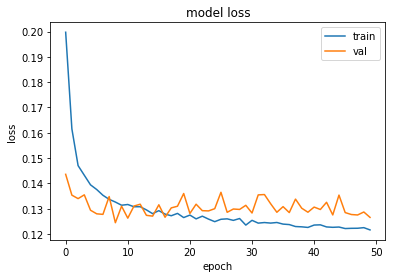

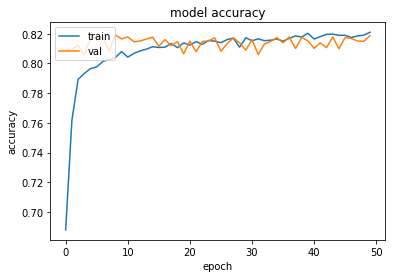

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()